In [ ]:
# Intialization
import os
import sys

os.environ["SPARK_HOME"] = "/home/talentum/spark"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.6"
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.3 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'pyspark-shell'

In [ ]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

In [ ]:
df_csv = spark.read.csv("autos.csv", header=True, inferSchema=True) #Reading Data From CSV file

In [ ]:
df_csv.printSchema() #printing Schema

root
 |-- index: string (nullable = true)
 |-- dateCrawled: string (nullable = true)
 |-- name: string (nullable = true)
 |-- seller: string (nullable = true)
 |-- offerType: string (nullable = true)
 |-- price: string (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: string (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: string (nullable = true)
 |-- model: string (nullable = true)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: string (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- dateCreated: string (nullable = true)
 |-- nrOfPictures: integer (nullable = true)
 |-- postalCode: string (nullable = true)
 |-- lastSeen: timestamp (nullable = true)



In [ ]:
df_csv.count() #getting total Row Count

371824

In [ ]:
df_csv_duplicates=df_csv.dropDuplicates() #Droping the Duplicates
df_csv_duplicates.count()

371824

In [ ]:
df_csv.columns #Getting the Column name


['index',
 'dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen']

In [ ]:
df_csv.select('price').describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            371823|
|   mean|17295.124087885943|
| stddev|  3587958.57312194|
|    min|                 0|
|    max|              test|
+-------+------------------+



In [ ]:
df_csv.filter("vehicleType is NULL").show()

+-----+-------------------+--------------------+------+---------+-----+-------+-----------+------------------+-------+-------+--------+---------+-------------------+--------+----------+-----------------+-------------------+------------+----------+-------------------+
|index|        dateCrawled|                name|seller|offerType|price| abtest|vehicleType|yearOfRegistration|gearbox|powerPS|   model|kilometer|monthOfRegistration|fuelType|     brand|notRepairedDamage|        dateCreated|nrOfPictures|postalCode|           lastSeen|
+-----+-------------------+--------------------+------+---------+-----+-------+-----------+------------------+-------+-------+--------+---------+-------------------+--------+----------+-----------------+-------------------+------------+----------+-------------------+
|    0|2016-03-24 11:52:17|          Golf_3_1.6|privat|  Angebot|  480|   test|       null|              1993|manuell|      0|    golf|   150000|                  0|  benzin|volkswagen|           

In [ ]:
df_csv=df_csv.drop('nrOfPictures','seller','lastSeen','dateCreated')

In [ ]:
df_csv.columns

['index',
 'dateCrawled',
 'name',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'postalCode']

In [ ]:
df_csv.select('brand').distinct().show() #Distinct Model of Car

+-------------+
|        brand|
+-------------+
|       jaguar|
|         nein|
|     daihatsu|
|   mitsubishi|
|         null|
|         lada|
|       toyota|
|         seat|
|         saab|
|   land_rover|
|      peugeot|
|     chrysler|
|      citroen|
|         audi|
|mercedes_benz|
|          bmw|
|         jeep|
|       lancia|
|        skoda|
|        rover|
+-------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import to_timestamp

In [ ]:
df_csv = df_csv.withColumn('dateCrawled', to_timestamp(df_csv["dateCrawled"], "yyyy-MM-dd HH:mm:ss"))
#Changing the car  price to Given Format


In [ ]:
df_csv.printSchema()

root
 |-- index: string (nullable = true)
 |-- dateCrawled: timestamp (nullable = true)
 |-- name: string (nullable = true)
 |-- offerType: string (nullable = true)
 |-- price: string (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: string (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: string (nullable = true)
 |-- model: string (nullable = true)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: string (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: string (nullable = true)



In [ ]:
df_csv.select('dateCrawled').show(5)

+-------------------+
|        dateCrawled|
+-------------------+
|2016-03-24 11:52:17|
|2016-03-24 10:58:45|
|2016-03-14 12:52:21|
|2016-03-17 16:54:04|
|2016-03-31 17:25:20|
+-------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import to_timestamp, year
df_csv = df_csv.withColumn("dateCrawled", year(df_csv["dateCrawled"]))

In [ ]:
df_csv.select('dateCrawled').show(5)

+-----------+
|dateCrawled|
+-----------+
|       2016|
|       2016|
|       2016|
|       2016|
|       2016|
+-----------+
only showing top 5 rows



In [ ]:
df_csv.printSchema()

root
 |-- index: string (nullable = true)
 |-- dateCrawled: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- offerType: string (nullable = true)
 |-- price: string (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: string (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: string (nullable = true)
 |-- model: string (nullable = true)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: string (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: string (nullable = true)



In [ ]:
df_csv.select('yearOfRegistration').show(10)

+------------------+
|yearOfRegistration|
+------------------+
|              1993|
|              2011|
|              2004|
|              2001|
|              2008|
|              1995|
|              2004|
|              1980|
|              2014|
|              1998|
+------------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import col, when
df_csv = df_csv.withColumn('yearOfRegistration', col('yearOfRegistration').cast("int"))
#Converting year of Registeration to int

In [ ]:
df_csv.printSchema()

root
 |-- index: string (nullable = true)
 |-- dateCrawled: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- offerType: string (nullable = true)
 |-- price: string (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: integer (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: string (nullable = true)
 |-- model: string (nullable = true)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: string (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: string (nullable = true)



In [ ]:
df_csv = df_csv.withColumn('Price', col('Price').cast("float")) #Converting Thr Price To float

In [ ]:
df_csv.printSchema()

root
 |-- index: string (nullable = true)
 |-- dateCrawled: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- offerType: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: integer (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: string (nullable = true)
 |-- model: string (nullable = true)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: string (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: string (nullable = true)



In [ ]:
df_csv = df_csv.withColumn('monthOfRegistration', col('monthOfRegistration').cast("int")) #ConvertingThe Month Of registeration to int


In [ ]:
df_csv.printSchema()

root
 |-- index: string (nullable = true)
 |-- dateCrawled: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- offerType: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: integer (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: string (nullable = true)
 |-- model: string (nullable = true)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: string (nullable = true)



In [ ]:
correlation_value2_value3 = df_csv.stat.corr("monthOfRegistration", "Price") #finding  the Correlation between MonthofRegisterationand price
print(f"Correlation between value2 and value3: {correlation_value2_value3}")

Correlation between value2 and value3: -0.0028176063434703284


In [ ]:
correlation_value2_value3 = df_csv.stat.corr("dateCrawled", "Price") #finding the Correaltion betwwen the Datecrawled and price
print(f"Correlation between value2 and value3: {correlation_value2_value3}")

Correlation between value2 and value3: 0.00013600453977892399


In [ ]:
df_csv.select("monthOfRegistration").distinct().show() #finding the Distict value for Month of Registeration

+-------------------+
|monthOfRegistration|
+-------------------+
|                 12|
|               null|
|                  1|
|                  6|
|                  3|
|                  5|
|                  9|
|                  4|
|                  8|
|                  7|
|                 10|
|                 11|
|                  2|
|                  0|
+-------------------+



In [ ]:
df_csv=df_csv.drop('offerType') #only two tyep agebot and Genuch

In [ ]:
df_csv.columns

['index',
 'dateCrawled',
 'name',
 'Price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'postalCode']

In [ ]:
zero_count = df_csv.filter(col("Price") == 0).count()
print(zero_count) #filtering the columns where price is 0

10779


In [ ]:
df_csv.columns

['index',
 'dateCrawled',
 'name',
 'Price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'postalCode']

In [ ]:
from pyspark.sql.functions import col, sum
df=df_csv
# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|      296|
|               name|        0|
|              Price|      297|
|             abtest|       30|
|        vehicleType|    37871|
| yearOfRegistration|      297|
|            gearbox|    20211|
|            powerPS|       15|
|              model|    20485|
|          kilometer|        1|
|monthOfRegistration|      297|
|           fuelType|    33388|
|              brand|       64|
|  notRepairedDamage|    72061|
|         postalCode|        1|
+-------------------+---------+



In [ ]:
df.select('Price').describe().show()

+-------+------------------+
|summary|             Price|
+-------+------------------+
|  count|            371527|
|   mean|17295.124128259857|
| stddev|3587958.5758335786|
|    min|               0.0|
|    max|      2.14748365E9|
+-------+------------------+



In [ ]:
# Calculate the 5th and 95th percentiles
quantiles = df.approxQuantile("price", [0.05, 0.95], 0.01)

# Extract the 5th and 95th percentiles
quantile_05 = quantiles[0]
quantile_95 = quantiles[1]

print(f"5th percentile: {quantile_05}")
print(f"95th percentile: {quantile_95}")

5th percentile: 250.0
95th percentile: 19500.0


In [ ]:
df_copy=df_csv

In [ ]:
df_copy = df_copy.filter(col("price") != 0)


In [ ]:

df=df_copy
# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|    34127|
| yearOfRegistration|        0|
|            gearbox|    17729|
|            powerPS|        0|
|              model|    18300|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|    29948|
|              brand|        0|
|  notRepairedDamage|    66769|
|         postalCode|        0|
+-------------------+---------+



In [ ]:
most_common_row = df_copy.groupBy("vehicleType").count().orderBy(col("count").desc()).first()
most_common = most_common_row["vehicleType"]
df_VehicleCopy = df_copy.fillna({"vehicleType": most_common}) #imputing the data with the Mode for the vehicleType

In [ ]:
df=df_VehicleCopy
# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|        0|
| yearOfRegistration|        0|
|            gearbox|    17729|
|            powerPS|        0|
|              model|    18300|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|    29948|
|              brand|        0|
|  notRepairedDamage|    66769|
|         postalCode|        0|
+-------------------+---------+



In [ ]:
value_counts = df_VehicleCopy.groupBy("vehicleType").count()

# Step 2: Sort by count in descending order
sorted_value_counts = value_counts.orderBy(col("count").desc())
sorted_value_counts.show()

+-----------+------+
|vehicleType| count|
+-----------+------+
|  limousine|127969|
| kleinwagen| 78209|
|      kombi| 66098|
|        bus| 29769|
|     cabrio| 22560|
|      coupe| 18487|
|        suv| 14501|
|     andere|  3155|
+-----------+------+



In [ ]:
most_common_row =df_VehicleCopy.groupBy("gearbox").count().orderBy(col("count").desc()).first()
most_common = most_common_row["gearbox"]

# Step 2: Replace missing values in 'gearbox' column with the most common value
df_VehicleCopy = df_VehicleCopy.fillna({"gearbox": most_common})

In [ ]:
df=df_VehicleCopy
# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|        0|
| yearOfRegistration|        0|
|            gearbox|        0|
|            powerPS|        0|
|              model|    18300|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|    29948|
|              brand|        0|
|  notRepairedDamage|    66769|
|         postalCode|        0|
+-------------------+---------+



In [ ]:
most_common_row =df_VehicleCopy.groupBy("fuelType").count().orderBy(col("count").desc()).first()
most_common = most_common_row["fuelType"]

# Step 2: Replace missing values in 'gearbox' column with the most common value
df_VehicleCopy = df_VehicleCopy.fillna({"fuelType": most_common})

In [ ]:
df=df_VehicleCopy
# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|        0|
| yearOfRegistration|        0|
|            gearbox|        0|
|            powerPS|        0|
|              model|    18300|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|        0|
|              brand|        0|
|  notRepairedDamage|    66769|
|         postalCode|        0|
+-------------------+---------+



In [ ]:
most_common_row =df_VehicleCopy.groupBy("notRepairedDamage").count().orderBy(col("count").desc()).first()
most_common = most_common_row["notRepairedDamage"]

# Step 2: Replace missing values in 'gearbox' column with the most common value
df_VehicleCopy = df_VehicleCopy.fillna({"notRepairedDamage": most_common})

In [ ]:
df=df_VehicleCopy
# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|        0|
| yearOfRegistration|        0|
|            gearbox|        0|
|            powerPS|        0|
|              model|    18300|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|        0|
|              brand|        0|
|  notRepairedDamage|        0|
|         postalCode|        0|
+-------------------+---------+



In [ ]:
df_VehicleCopy.columns

['index',
 'dateCrawled',
 'name',
 'Price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'postalCode']

In [ ]:
df_day2=df_VehicleCopy

In [ ]:
df=df_day2

In [ ]:
from pyspark.sql.functions import col, sum
df.select('powerPS').describe().show()

+-------+------------------+
|summary|           powerPS|
+-------+------------------+
|  count|            360748|
|   mean|116.57623604288867|
| stddev|190.60860977764153|
|    min|                 0|
|    max|              9999|
+-------+------------------+



In [ ]:
df=df.withColumn("powerPS", col("powerPS").cast("int")) #converting the power ps to the int

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Calculate the 5th and 95th percentiles
quantiles = df.approxQuantile("powerPS", [0.05, 0.95], 0.01)

# Extract the 5th and 95th percentiles
quantile_05 = quantiles[0]
quantile_95 = quantiles[1]

print(f"5th percentile: {quantile_05}")
print(f"95th percentile: {quantile_95}")

5th percentile: 0.0
95th percentile: 231.0


In [ ]:
df_imputed = df.withColumn("powerPS",
                           when(col("powerPS") < 40, 40)
                           .when(col("powerPS") > 15000, 15000)
                           .otherwise(col("powerPS")))
df_imputed.show(5) #imputing the data for powerps

+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+
|index|dateCrawled|                name|  Price|abtest|vehicleType|yearOfRegistration|  gearbox|powerPS|model|kilometer|monthOfRegistration|fuelType|     brand|notRepairedDamage|postalCode|
+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+
|    0|       2016|          Golf_3_1.6|  480.0|  test|  limousine|              1993|  manuell|     40| golf|   150000|                  0|  benzin|volkswagen|             nein|     70435|
|    1|       2016|A5_Sportback_2.7_Tdi|18300.0|  test|      coupe|              2011|  manuell|    190| null|   125000|                  5|  diesel|      audi|               ja|     66954|
|    2|       2016|"Jeep_Grand_Chero...| 9800.0|  

In [ ]:
df=df_imputed

In [ ]:
df.select('model').distinct().count()

252

In [ ]:
df_VehicleCopy=df
most_common_row =df_VehicleCopy.groupBy("model").count().orderBy(col("count").desc()).first()
most_common = most_common_row["model"]

# Step 2: Replace missing values in 'gearbox' column with the most common value
df_VehicleCopy = df_VehicleCopy.fillna({"model": most_common})

In [ ]:
df=df_VehicleCopy

In [ ]:

# Get the list of columns
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|        0|
| yearOfRegistration|        0|
|            gearbox|        0|
|            powerPS|        0|
|              model|        0|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|        0|
|              brand|        0|
|  notRepairedDamage|        0|
|         postalCode|        0|
+-------------------+---------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
df = df.withColumn("monthOfRegistration", when(col("monthOfRegistration") == 0, 1).otherwise(col("monthOfRegistration")))
#converting the month of registeration from 0 to 1

In [ ]:
zero_count = df.filter(col("monthOfRegistration") == 0).count()
print(zero_count) #printing the number of time where monthofregisteration is 0

0


In [ ]:
df = df.withColumn("postalCode", col("postalCode").cast("int")) #converting the postalcode to int

In [ ]:
df.select('postalCode').distinct().count() #calculating the distinct value for postalcode

8146

In [ ]:
df.select('gearbox').distinct().show() #getting distinct value for gearbox

+---------+
|  gearbox|
+---------+
|automatik|
|  manuell|
+---------+



In [ ]:
# Rename column values
df_renamed = df.withColumn('gearbox',
                           when(col('gearbox') == "automatik", "Automatic")
                           .when(col('gearbox') == "manuell", "Manual")
                          )
df_renamed.show(5) #translating from german to english

+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+
|index|dateCrawled|                name|  Price|abtest|vehicleType|yearOfRegistration|  gearbox|powerPS|model|kilometer|monthOfRegistration|fuelType|     brand|notRepairedDamage|postalCode|
+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+
|    0|       2016|          Golf_3_1.6|  480.0|  test|  limousine|              1993|   Manual|     40| golf|   150000|                  1|  benzin|volkswagen|             nein|     70435|
|    1|       2016|A5_Sportback_2.7_Tdi|18300.0|  test|      coupe|              2011|   Manual|    190| golf|   125000|                  5|  diesel|      audi|               ja|     66954|
|    2|       2016|"Jeep_Grand_Chero...| 9800.0|  

In [ ]:
df=df_renamed
df.select('gearbox').distinct().show()

+---------+
|  gearbox|
+---------+
|Automatic|
|   Manual|
+---------+



In [ ]:
df.select('vehicleType').distinct().show() #getting the distinct value for vehicleType

+-----------+
|vehicleType|
+-----------+
|      coupe|
| kleinwagen|
|        bus|
|     andere|
|  limousine|
|     cabrio|
|        suv|
|      kombi|
+-----------+



In [ ]:
df_renamed = df.withColumn('vehicleType',
                           when(col('vehicleType') == "coupe", "coupe")
                           .when(col('vehicleType') == "kleinwagen", "small_car")
                           .when(col( 'vehicleType' ) == "limousine", "sedan")
                           .when(col('vehicleType') == "cabrio", "convertible")
                           .when(col('vehicleType') == "bus", "bus")
                           .when(col('vehicleType') == "kombi", "station_wagon")
                           .when(col('vehicleType') == "andere", "Others")
                           .when(col('vehicleType') == "suv", "suv")
                          )

#translating the german to english


In [ ]:
df=df_renamed
df.select('vehicleType').distinct().show()

+-------------+
|  vehicleType|
+-------------+
|        coupe|
|          bus|
|station_wagon|
|    small_car|
|          suv|
|  convertible|
|       Others|
|        sedan|
+-------------+



In [ ]:
df.select('fuelType').distinct().show() #getting the Distinct fuel type

+--------+
|fuelType|
+--------+
|  benzin|
| elektro|
|  andere|
|  diesel|
|     cng|
|  hybrid|
|     lpg|
+--------+



In [ ]:
df_renamed = df.withColumn('fuelType',
                           when(col('fuelType') == "benzin", "Petrol")
                           .when(col('fuelType') == "elektro", "Electric")
                           .when(col( 'fuelType' ) == "lpg", "LPG")
                           .when(col('fuelType') == "diesel", "Diesel")
                           .when(col('fuelType') == "cng", "CNG")
                           .when(col('fuelType') == "hybrid", "Hybrid")
                           .when(col('fuelType') == "andere", "Others")
                          )
#translating the fueltype from german to english

In [ ]:
df=df_renamed
df.select('fuelType').distinct().show()

+--------+
|fuelType|
+--------+
|  Diesel|
|  Hybrid|
|     CNG|
|  Others|
|Electric|
|     LPG|
|  Petrol|
+--------+



In [ ]:
#df = spark.createDataFrame(df_VehicleCopy, df_VehicleCopy.columns)
#df_VehicleCopy=df
#pandas_df = df_VehicleCopy.toPandas()

In [ ]:
df_VehicleCopy.show(5)

+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+
|index|dateCrawled|                name|  Price|abtest|vehicleType|yearOfRegistration|  gearbox|powerPS|model|kilometer|monthOfRegistration|fuelType|     brand|notRepairedDamage|postalCode|
+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+
|    0|       2016|          Golf_3_1.6|  480.0|  test|      sedan|              1993|   Manual|     40| golf|   150000|                  1|  Petrol|volkswagen|             nein|     70435|
|    1|       2016|A5_Sportback_2.7_Tdi|18300.0|  test|      coupe|              2011|   Manual|    190| golf|   125000|                  5|  Diesel|      audi|               ja|     66954|
|    2|       2016|"Jeep_Grand_Chero...| 9800.0|  

In [ ]:
df.select('notRepairedDamage').distinct().show() #finding the diatinct value for not repaird damage

+-----------------+
|notRepairedDamage|
+-----------------+
|             nein|
|               ja|
+-----------------+



In [ ]:
df_renamed = df.withColumn('notRepairedDamage',
                           when(col('notRepairedDamage') == "nein", "No")
                           .when(col('notRepairedDamage') == "ja", "Yes")
                          )
#translating the german to english

In [ ]:
df=df_renamed
df.select('notRepairedDamage').distinct().show()

+-----------------+
|notRepairedDamage|
+-----------------+
|               No|
|              Yes|
+-----------------+



In [ ]:
df.columns

['index',
 'dateCrawled',
 'name',
 'Price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'postalCode']

In [ ]:
df_with_difference = df.withColumn("Car_age", col('dateCrawled') - col("yearOfRegistration"))


In [ ]:

df_with_difference.select('Car_age').show(5)
 # this contains the Index and name column data

+-------+
|Car_age|
+-------+
|     23|
|      5|
|     12|
|     15|
|      8|
+-------+
only showing top 5 rows



In [ ]:
df.select('dateCrawled').show(2)

+-----------+
|dateCrawled|
+-----------+
|       2016|
|       2016|
+-----------+
only showing top 2 rows



In [ ]:
from pyspark.sql.functions import col, expr
df = df.withColumn('dateString', expr("concat(dateCrawled, '-01-01')"))

# Convert the date string to DateType
df = df.withColumn('dateCrawled', col('dateString').cast('date'))

# Drop the intermediate 'dateString' column
df = df.drop('dateString')

# Show the DataFrame with the new 'dateCrawled' colum
df.describe

<bound method DataFrame.describe of DataFrame[index: string, dateCrawled: date, name: string, Price: float, abtest: string, vehicleType: string, yearOfRegistration: int, gearbox: string, powerPS: int, model: string, kilometer: int, monthOfRegistration: int, fuelType: string, brand: string, notRepairedDamage: string, postalCode: int, Car_age: int]>

In [ ]:
df.select('dateCrawled').show(2)

+-----------+
|dateCrawled|
+-----------+
| 2016-01-01|
| 2016-01-01|
+-----------+
only showing top 2 rows



In [ ]:
df = df.withColumn('dateString', expr("concat(yearOfRegistration, '-01-01')"))

# Convert the date string to DateType
df = df.withColumn('yearOfRegistration', col('dateString').cast('date'))

# Drop the intermediate 'dateString' column
df = df.drop('dateString')

# Show the DataFrame with the new 'dateCrawled' colum
df.describe

<bound method DataFrame.describe of DataFrame[index: string, dateCrawled: date, name: string, Price: float, abtest: string, vehicleType: string, yearOfRegistration: date, gearbox: string, powerPS: int, model: string, kilometer: int, monthOfRegistration: int, fuelType: string, brand: string, notRepairedDamage: string, postalCode: int, Car_age: int]>

In [ ]:
df.select('yearOfRegistration').show(2)

+------------------+
|yearOfRegistration|
+------------------+
|        1993-01-01|
|        2011-01-01|
+------------------+
only showing top 2 rows



In [ ]:
from pyspark.sql.functions import col, datediff
df_dateDiff=df
df_dateDiff = df_dateDiff.withColumn('Car_age', datediff(col('dateCrawled'), col('yearOfRegistration')))
#calculating the date difference between datecrawled and yearofregistration

In [ ]:
df_dateDiff.select('Car_age').show(10) #car age comes out to in years

+-------+
|Car_age|
+-------+
|   8400|
|   1826|
|   4383|
|   5478|
|   2922|
|   7670|
|   4383|
|    730|
|   6574|
|   4383|
+-------+
only showing top 10 rows



In [ ]:
df_dateDiff = df_dateDiff.withColumn('Car_age', col('Car_age') / 365)
df_dateDiff.select('Car_age').show(10)
#car age is converted to the year format

+------------------+
|           Car_age|
+------------------+
|23.013698630136986|
| 5.002739726027397|
|12.008219178082191|
|15.008219178082191|
| 8.005479452054795|
|21.013698630136986|
|12.008219178082191|
|               2.0|
| 18.01095890410959|
|12.008219178082191|
+------------------+
only showing top 10 rows



In [ ]:
df_dateDiff = df_dateDiff.withColumn('Car_age', col('Car_age').cast('integer'))
df_dateDiff.select('Car_age').show(10) #converting float to integer datatype for car_age

+-------+
|Car_age|
+-------+
|     23|
|      5|
|     12|
|     15|
|      8|
|     21|
|     12|
|      2|
|     18|
|     12|
+-------+
only showing top 10 rows



In [ ]:
import pyspark.sql.functions as F

# Define the number of bins
num_bins = 80

# Compute histogram
hist = df_dateDiff.select('Car_age').rdd.flatMap(lambda x: x).histogram(num_bins)

# Display histogram
for i in range(len(hist[0]) - 1):
    print(f"Bin {i+1}: ({hist[0][i]}, {hist[0][i+1]}): {hist[1][i]}")

#plotting the histogram for the Car_age


Bin 1: (-7988.0, -7875.45): 19
Bin 2: (-7875.45, -7762.9): 0
Bin 3: (-7762.9, -7650.35): 0
Bin 4: (-7650.35, -7537.8): 0
Bin 5: (-7537.8, -7425.25): 1
Bin 6: (-7425.25, -7312.7): 0
Bin 7: (-7312.7, -7200.15): 0
Bin 8: (-7200.15, -7087.6): 0
Bin 9: (-7087.6, -6975.05): 4
Bin 10: (-6975.05, -6862.5): 2
Bin 11: (-6862.5, -6749.95): 0
Bin 12: (-6749.95, -6637.4): 0
Bin 13: (-6637.4, -6524.85): 0
Bin 14: (-6524.85, -6412.3): 1
Bin 15: (-6412.3, -6299.75): 0
Bin 16: (-6299.75, -6187.2): 1
Bin 17: (-6187.2, -6074.65): 0
Bin 18: (-6074.65, -5962.1): 2
Bin 19: (-5962.1, -5849.55): 0
Bin 20: (-5849.55, -5737.0): 2
Bin 21: (-5737.0, -5624.450000000001): 0
Bin 22: (-5624.450000000001, -5511.9): 0
Bin 23: (-5511.9, -5399.35): 1
Bin 24: (-5399.35, -5286.8): 0
Bin 25: (-5286.8, -5174.25): 0
Bin 26: (-5174.25, -5061.700000000001): 1
Bin 27: (-5061.700000000001, -4949.15): 4
Bin 28: (-4949.15, -4836.6): 0
Bin 29: (-4836.6, -4724.05): 0
Bin 30: (-4724.05, -4611.5): 0
Bin 31: (-4611.5, -4498.950000000001

In [ ]:
from pyspark.sql.functions import stddev_samp
stddev_df = df_dateDiff.agg(stddev_samp('Car_age').alias('stddev'))

# Show the result
stddev_df.show()
df_dateDiff.select('Car_age').describe().show()


+----------------+
|          stddev|
+----------------+
|82.1505593217502|
+----------------+

+-------+------------------+
|summary|           Car_age|
+-------+------------------+
|  count|            360748|
|   mean|11.548895627972989|
| stddev|  82.1505593217502|
|    min|             -7988|
|    max|              1016|
+-------+------------------+



In [ ]:
from pyspark.sql.functions import when, col
df_imputed = df_dateDiff.withColumn("Car_age",
                           when(col("Car_age") < 3, 3)
                           .when(col("Car_age") > 93, 93)
                           .otherwise(col("Car_age")))
df_imputed.show(5)
#imputing data for the Car_age

+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+-------+
|index|dateCrawled|                name|  Price|abtest|vehicleType|yearOfRegistration|  gearbox|powerPS|model|kilometer|monthOfRegistration|fuelType|     brand|notRepairedDamage|postalCode|Car_age|
+-----+-----------+--------------------+-------+------+-----------+------------------+---------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+-------+
|    0| 2016-01-01|          Golf_3_1.6|  480.0|  test|      sedan|        1993-01-01|   Manual|     40| golf|   150000|                  1|  Petrol|volkswagen|               No|     70435|     23|
|    1| 2016-01-01|A5_Sportback_2.7_Tdi|18300.0|  test|      coupe|        2011-01-01|   Manual|    190| golf|   125000|                  5|  Diesel|      audi|              Yes|     66954|      5|
|    2| 20

In [ ]:
from pyspark.sql.functions import min, max
min_max_df = df_imputed.select(min("Car_age").alias("min_value"), max("Car_age").alias("max_value"))
min_max_df.show()

+---------+---------+
|min_value|max_value|
+---------+---------+
|        3|       93|
+---------+---------+



In [ ]:
df=df_imputed

In [ ]:
df.printSchema()

root
 |-- index: string (nullable = true)
 |-- dateCrawled: date (nullable = true)
 |-- name: string (nullable = true)
 |-- Price: float (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: date (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: integer (nullable = true)
 |-- model: string (nullable = false)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: integer (nullable = true)
 |-- Car_age: integer (nullable = true)



In [ ]:
 df_dropped=df.drop(*[ 'index','name'])
#froppin the column for index and name

In [ ]:
df_dropped.printSchema()

root
 |-- dateCrawled: date (nullable = true)
 |-- Price: float (nullable = true)
 |-- abtest: string (nullable = true)
 |-- vehicleType: string (nullable = true)
 |-- yearOfRegistration: date (nullable = true)
 |-- gearbox: string (nullable = true)
 |-- powerPS: integer (nullable = true)
 |-- model: string (nullable = false)
 |-- kilometer: integer (nullable = true)
 |-- monthOfRegistration: integer (nullable = true)
 |-- fuelType: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- notRepairedDamage: string (nullable = true)
 |-- postalCode: integer (nullable = true)
 |-- Car_age: integer (nullable = true)



In [ ]:
df=df_dropped

In [ ]:
columns = df.columns

# Create a dictionary to store the null count for each column
null_counts = {col_name: df.filter(col(col_name).isNull()).count() for col_name in columns}

# Convert the dictionary to a DataFrame for better display
null_counts_df = spark.createDataFrame([(k, v) for k, v in null_counts.items()], ["Column", "NullCount"])

# Show the null counts
null_counts_df.show()

+-------------------+---------+
|             Column|NullCount|
+-------------------+---------+
|              index|        0|
|        dateCrawled|        0|
|               name|        0|
|              Price|        0|
|             abtest|        0|
|        vehicleType|        0|
| yearOfRegistration|        0|
|            gearbox|        0|
|            powerPS|        0|
|              model|        0|
|          kilometer|        0|
|monthOfRegistration|        0|
|           fuelType|        0|
|              brand|        0|
|  notRepairedDamage|        0|
|         postalCode|        0|
|            Car_age|        0|
+-------------------+---------+



In [ ]:
df.show(1)

+-----+-----------+----------+-----+------+-----------+------------------+-------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+-------+
|index|dateCrawled|      name|Price|abtest|vehicleType|yearOfRegistration|gearbox|powerPS|model|kilometer|monthOfRegistration|fuelType|     brand|notRepairedDamage|postalCode|Car_age|
+-----+-----------+----------+-----+------+-----------+------------------+-------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+-------+
|    0| 2016-01-01|Golf_3_1.6|480.0|  test|      sedan|        1993-01-01| Manual|     40| golf|   150000|                  1|  Petrol|volkswagen|               No|     70435|     23|
+-----+-----------+----------+-----+------+-----------+------------------+-------+-------+-----+---------+-------------------+--------+----------+-----------------+----------+-------+
only showing top 1 row



In [ ]:
#Data Is Stored on Hive HDFS Automatically
#tablename="Project_Autos.autos"
#df.write.mode("overwrite").saveAsTable(tablename)

In [ ]:
#output_path = "MainData"  # Change this to your desired output path
#df_VehicleCopy=df
#pandas_df = df_VehicleCopy.toPandas()
# Save DataFrame to CSV
#df.write.csv(output_path, header=True)

In [ ]:
#Creating Secound Columns

In [ ]:
#Deleating columns for dateCrawled,name,yearOfRegistration
#df2=df

In [ ]:
#df_dropped=df2.drop(*[ 'index','dateCrawled','name','yearOfRegistration'])

In [ ]:
#df_dropped.columns

['Price',
 'abtest',
 'vehicleType',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'postalCode',
 'Car_age']

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

# Initialize Spark session
spark = SparkSession.builder.appName("OutlierRemoval").getOrCreate()

def calculate_quantiles(spark_df):
    quantiles = {}
    for column in spark_df.columns:
        if spark_df.schema[column].dataType in ('double', 'float'):
            result = spark_df.selectExpr(f"percentile_approx({column}, array(0.1, 0.9)) as quantiles").first()
            if result and result['quantiles']:
                # Check if the quantiles list has exactly 2 elements
                if len(result['quantiles']) == 2:
                    quantiles[column] = {
                        'Q1': result['quantiles'][0],
                        'Q3': result['quantiles'][1]
                    }
                else:
                    print(f"Unexpected quantiles length for column: {column}")
                    quantiles[column] = {'Q1': None, 'Q3': None}
            else:
                print(f"Quantile calculation failed for column: {column}")
                quantiles[column] = {'Q1': None, 'Q3': None}
    return quantiles

def remove_outliers(spark_df):
    quantile_dict = calculate_quantiles(spark_df)

    filters = []
    for column, stats in quantile_dict.items():
        if stats['Q1'] is not None and stats['Q3'] is not None:
            Q1 = stats['Q1']
            Q3 = stats['Q3']
            IQR = Q3 - Q1
            filters.append(
                (col(column) >= (Q1 - 1.5 * IQR)) & (col(column) <= (Q3 + 1.5 * IQR))
            )
        else:
            print(f"Skipping column {column} due to missing quantiles.")

    if filters:
        combined_filter = filters[0]
        for f in filters[1:]:
            combined_filter = combined_filter & f

        filtered_df = spark_df.filter(combined_filter)
    else:
        print("No valid filters were applied.")
        filtered_df = spark_df

    return filtered_df

# Assuming `df_dropped` is your DataFrame
clean_user_car = remove_outliers(df_dropped)

# Show the cleaned DataFrame
clean_user_car.show()


No valid filters were applied.
+-------+-------+-------------+---------+-------+--------+---------+-------------------+--------+-------------+-----------------+----------+-------+
|  Price| abtest|  vehicleType|  gearbox|powerPS|   model|kilometer|monthOfRegistration|fuelType|        brand|notRepairedDamage|postalCode|Car_age|
+-------+-------+-------------+---------+-------+--------+---------+-------------------+--------+-------------+-----------------+----------+-------+
|  480.0|   test|        sedan|   Manual|     40|    golf|   150000|                  1|  Petrol|   volkswagen|               No|     70435|     23|
|18300.0|   test|        coupe|   Manual|    190|    golf|   125000|                  5|  Diesel|         audi|              Yes|     66954|      5|
| 9800.0|   test|          suv|Automatic|    163|   grand|   125000|                  8|  Diesel|         jeep|               No|     90480|     12|
| 1500.0|   test|    small_car|   Manual|     75|    golf|   150000|       

In [ ]:
#loading  the data to the Hive wearhouse
df2=clean_user_car
tablename="Project_Autos.autos_Data_Modified"
df2.write.mode("overwrite").saveAsTable(tablename)

In [ ]:
output_path = "DataFor_Analysis"  # Change this to your desired output path
#df_VehicleCopy=df
#pandas_df = df_VehicleCopy.toPandas()
# Save DataFrame to CSV
df2.write.csv(output_path, header=True)

    100% |████████████████████████████████| 256kB 391kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
#---------------------------Machine-Learning---------------------------------------


In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
#car=pd.read_csv("E:/cdac/Project-End-Cdac-4Members/after_iqr.csv")
car=pd.read_csv("/content/after_iqr.csv")
car_data=car.copy()

In [6]:
car_data.head()

,Price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,Car_age
0,480.0,test,sedan,Manual,40,golf,150000,1.0,Petrol,volkswagen,No,70435.0,23.0
1,18300.0,test,coupe,Manual,190,golf,125000,5.0,Diesel,audi,Yes,66954.0,5.0
2,9800.0,test,suv,Automatic,163,grand,125000,8.0,Diesel,jeep,No,90480.0,12.0
3,1500.0,test,small_car,Manual,75,golf,150000,6.0,Petrol,volkswagen,No,91074.0,15.0
4,3600.0,test,small_car,Manual,69,fabia,90000,7.0,Diesel,skoda,No,60437.0,8.0


In [9]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    # Calculate the 10th and 90th percentiles (Q1 and Q3)
    Q1 = df.quantile(0.1, numeric_only=True)
    Q3 = df.quantile(0.9, numeric_only=True)
    IQR = Q3 - Q1

    # Filter the DataFrame to only include columns that are in the IQR calculation
    df_filtered = df[Q1.index]

    # Apply the outlier removal condition
    filtered_df = df_filtered[~((df_filtered < (Q1 - 1.5 * IQR)) | (df_filtered > (Q3 + 1.5 * IQR))).any(axis=1)]

    # Return the original DataFrame without outliers, including non-numeric columns
    return df.loc[filtered_df.index]

# Assuming `new_car` is your DataFrame
clean_user_car = remove_outliers(car_data)

In [10]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ["notRepairedDamage", "vehicleType",
            "abtest", "gearbox", "model", "fuelType", "brand"] # Initialize a list of categorical column names

encoder = LabelEncoder() # Initialize a LabelEncoder object
encoded_user_car = clean_user_car.copy() # Make a copy of the clean_user_car dataframe and assign it to encoded_user_car
encoded_user_car[cat_cols] = encoded_user_car[cat_cols].apply(encoder.fit_transform) # Apply the fit_transform method of the encoder object to the categorical columns of the encoded_user_car dataframe


In [11]:
encoded_user_car.head()

,Price,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,Car_age
0,480.0,1,4,1,40,117,150000,1.0,6,38,0,70435.0,23.0
1,18300.0,1,3,1,190,117,125000,5.0,1,1,1,66954.0,5.0
2,9800.0,1,7,0,163,118,125000,8.0,1,14,0,90480.0,12.0
3,1500.0,1,5,1,75,117,150000,6.0,6,38,0,91074.0,15.0
4,3600.0,1,5,1,69,102,90000,7.0,1,31,0,60437.0,8.0


In [12]:
correlation_matrix = encoded_user_car.corr()

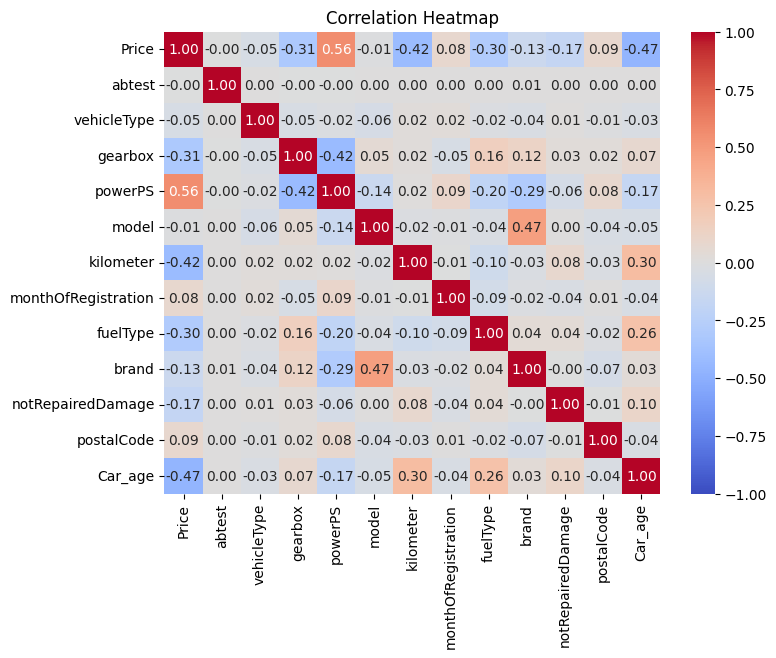

In [13]:
plt.figure(figsize=(8,6))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)

# Add title
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap1.png', format='png', dpi=300)

In [14]:
X = encoded_user_car.drop(["Price"], axis=1)
y = encoded_user_car["Price"]

In [15]:
encoded_user_car.shape

(138122, 13)

In [16]:
X.head()

,abtest,vehicleType,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,Car_age
0,1,4,1,40,117,150000,1.0,6,38,0,70435.0,23.0
1,1,3,1,190,117,125000,5.0,1,1,1,66954.0,5.0
2,1,7,0,163,118,125000,8.0,1,14,0,90480.0,12.0
3,1,5,1,75,117,150000,6.0,6,38,0,91074.0,15.0
4,1,5,1,69,102,90000,7.0,1,31,0,60437.0,8.0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print(f"Train Shape : {X_train.shape} --------- Test Shape : {X_test.shape}")

Train Shape : (110497, 12) --------- Test Shape : (27625, 12)


In [18]:
from sklearn.metrics import r2_score

scores = {"r2_score" : make_scorer
          , "mae" : make_scorer(mean_absolute_error), "mse" : make_scorer(mean_squared_error)}

XGBoost

In [19]:
model = xgb.XGBRegressor(tree_method="hist", n_estimators = 1000)
result = cross_validate(model, X_train, y_train, cv = 5, verbose = 2, scoring=scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(


[CV] END .................................................... total time=  23.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(


[CV] END .................................................... total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(


[CV] END .................................................... total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(


[CV] END .................................................... total time=   9.2s
[CV] END .................................................... total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3112, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(


In [20]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f"R2 Score : {r2_score(y_test, pred)}")
#------R2 Score : 0.8948905941588821---------

R2 Score : 0.8765666754933225


Linear Regression


In [ ]:
modellr =LinearRegression()

modellr.fit(X_train, y_train)


In [ ]:
# Predict on the test data
y_pred = modellr.predict(X_test)

# Calculate R² (accuracy for regression)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Linear Regression:")
print(f"R² (Accuracy): {r2:.4f}")
#Linear Regression:
#R² (Accuracy): 0.6055

Decision Tree Regressor

In [ ]:
# Initialize the model
model = DecisionTreeRegressor(random_state=1)

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
#R² Score: 0.792013979951945

SVR

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
modelsvr = SVR(kernel='rbf')

# Train the model
modelsvr.fit(X_train_scaled, y_train)


In [ ]:
# Make predictions on the test set
y_pred = modelsvr.predict(X_test_scaled)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Random Forest Regressor

In [ ]:
# Initialize the Random Forest Regressor
modelrfr = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the model
modelrfr.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = modelrfr.predict(X_test)
# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
#

KNN

In [ ]:
# Initialize the KNN Regressor
modelknn = KNeighborsRegressor(n_neighbors=5)

# Train the model
modelknn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelknn.predict(X_test)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Neural Networks

In [ ]:
# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% dropout rate

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% dropout rate

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% dropout rate

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

# Predicting and calculating R² score
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


In [ ]:
import joblib
# Load the model
loaded_model = joblib.load("E:/cdac/Project-End-Cdac-4Members/Models/XGBoost-model.pkl")

In [ ]:
#Give here the values you need
#1,3,1,190,117,125000,5,1,1,1,66954,5
#1,4,1,40,117,15000,1,6,38,0,70435,23
new=np.array([1,3,1,190,117,125000,5,1,1,1,66954,5])
# Reshape to 2D array (1 observation, 12 features)
new_data= new.reshape(1,-1)
# Make predictions and evaluate
loaded_model.predict(new_data)